# Librerias

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Conexión a repositorio de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lectura de datos

In [3]:
#Leemos los datos
df = pd.read_csv("/content/drive/MyDrive/Data/weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


# Función de recta

In [4]:
#Ya sabemos que la recta tiene la forma:
# Y = b + wX

def recta(x, w, b):
  y = b + w*x
  return y

# Función de error cuadrático

In [5]:
#Definicion de la funcion de costo de error cuadrático
def mean_squared_error(y_real, y_hipotesis):
  #Restamos uno a uno cada elemento del array y lo elevamos al cuadrado
  #Obtenemos un array "error" con la diferencia de cada elemento
  error = (y_real - y_hipotesis)**2

  #Sumamos todos los elementos restados y lo dividmos entre el número de elementos (hacemos un promedio)
  error_promedio = error.mean()

  return error_promedio

# Función para evaluar diferentes calibraciones de la recta manteniendo b=0

In [6]:
#Definimos algunas calibraciones para w
w = [0.0, 1.5, 1.9, 2.3, 2.7, 3.1, 3.5]
b = 0

In [7]:
#Array de errores en donde almacenaremos los errores de cada calibracion
error = np.zeros(len(w))
error

array([0., 0., 0., 0., 0., 0., 0.])

In [8]:
#Implementamos la función
def calibrar_recta_b_constante(x_real, y_real, w, b):

  #Iteramos las calibraciones
  for i, _w in enumerate(w):
    #Obtenemos los y hipotesis
    y_hipotesis = recta(x_real, _w, b)

    #Obtenemos el error
    error[i] = mean_squared_error(y_real, y_hipotesis)

    #Graficamos
    plt.plot(x_real, y_hipotesis, color = 'red', linewidth = '3')

  #Obtenemos el índice de la calibración que nos dio el error mínimo
  indice = error.argmin()

  #Devolvemos el indice
  return indice

# Aplicamos la función

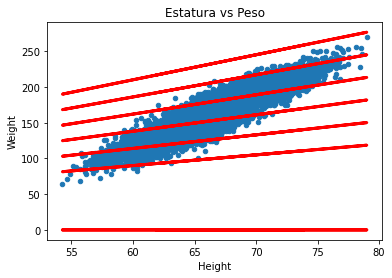

In [9]:
#Graficamos la nube de puntos
df.plot(
    kind = 'scatter',
    x = 'Height',
    y = 'Weight',
    title = 'Estatura vs Peso'
)

#Seleccionamos las columnas con las que trabajaremos
x_real = df['Height'].values
y_real = df['Weight'].values

#Usamos la función para calibrar
indice = calibrar_recta_b_constante(x_real, y_real, w, b)

In [10]:
#Vemos cuál calibración fue la mejor
w[indice]

2.3

In [11]:
#Veamos el array de errores
error

array([27093.83757456,  4551.70999642,  1899.26176046,   661.03911814,
         837.04206944,  2427.27061438,  5431.72475296])

Notemos como el error alcanza un mínimo y luego vuelve a subir

Esto se debe a que la función de error al elevar al cuadrado la diferencia de errores en la gráfica "error vs W" obtendremos una gráfica cuadrática

Una gráfica cuadrática siempre nos garantiza un valor mínimo global, por lo tanto en ese mínimo global podemos encontrar la recta con el error más pequeño y por lo tanto la recta que mejor represente la realidad

# Gráfico de la función de costo como función cuadrática con un mínimo global

In [12]:
#Para este ejemplo, b  ha sido constante (b = 0)
b

0

In [13]:
#Hemos probado estas calibraciones para W
w

[0.0, 1.5, 1.9, 2.3, 2.7, 3.1, 3.5]

In [14]:
#Y hemos obtenido estos errores para cada una
error

array([27093.83757456,  4551.70999642,  1899.26176046,   661.03911814,
         837.04206944,  2427.27061438,  5431.72475296])

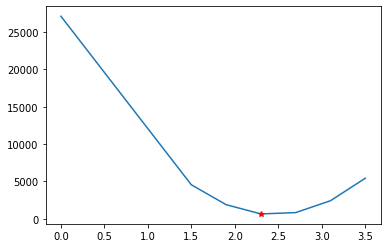

In [15]:
#Gráfico de error vs W
plt.plot(w, error)

#Punto de error mínimo
plt.plot(w[indice], error[indice], 'r*')

Notamos que al graficar la función de costo, tenemos un mínimo global que está cercano al w = 2.5

Para nuestras calibraciones hemos obtenido w = 2.3

# Probemos más calibraciones entre el rango de 0 y 3.5

Ya sabemos que entre 0 y 3.5 se garantiza un mínimo global, probemos diferentes W entre ese rango

In [16]:
#Creamos 100 elementos equidistantes entre 0 y 3.5
w = np.linspace(0, 3.5, 100)
w

array([0.        , 0.03535354, 0.07070707, 0.10606061, 0.14141414,
       0.17676768, 0.21212121, 0.24747475, 0.28282828, 0.31818182,
       0.35353535, 0.38888889, 0.42424242, 0.45959596, 0.49494949,
       0.53030303, 0.56565657, 0.6010101 , 0.63636364, 0.67171717,
       0.70707071, 0.74242424, 0.77777778, 0.81313131, 0.84848485,
       0.88383838, 0.91919192, 0.95454545, 0.98989899, 1.02525253,
       1.06060606, 1.0959596 , 1.13131313, 1.16666667, 1.2020202 ,
       1.23737374, 1.27272727, 1.30808081, 1.34343434, 1.37878788,
       1.41414141, 1.44949495, 1.48484848, 1.52020202, 1.55555556,
       1.59090909, 1.62626263, 1.66161616, 1.6969697 , 1.73232323,
       1.76767677, 1.8030303 , 1.83838384, 1.87373737, 1.90909091,
       1.94444444, 1.97979798, 2.01515152, 2.05050505, 2.08585859,
       2.12121212, 2.15656566, 2.19191919, 2.22727273, 2.26262626,
       2.2979798 , 2.33333333, 2.36868687, 2.4040404 , 2.43939394,
       2.47474747, 2.51010101, 2.54545455, 2.58080808, 2.61616

In [17]:
#Preparamos un array de 100 elementos para los erores
error = np.zeros(len(w))

In [18]:
#Volvemos a implementar la función, pero sin graficar, serían muchas rectas
def calibrar_recta_b_constante(x_real, y_real, w, b):

  #Iteramos las calibraciones
  for i, _w in enumerate(w):
    #Obtenemos los y hipotesis
    y_hipotesis = recta(x_real, _w, b)

    #Obtenemos el error
    error[i] = mean_squared_error(y_real, y_hipotesis)

  #Obtenemos el índice de la calibración que nos dio el error mínimo
  indice = error.argmin()

  #Devolvemos el indice
  return indice

In [19]:
#Seleccionamos las columnas con las que trabajaremos
x_real = df['Height'].values
y_real = df['Weight'].values

#Usamos la función para calibrar
indice = calibrar_recta_b_constante(x_real, y_real, w, b)

In [20]:
#Veamos el índice de qué calibración fue la mejor
indice

69

In [21]:
#Vemos cuál calibración fue la mejor
w[indice]

2.4393939393939394

In [22]:
#Veamos el array de errores
error[indice]

561.8283568955101

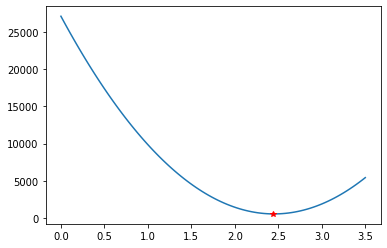

In [23]:
#Gráfico de error vs W
plt.plot(w, error)

#Punto de error mínimo
plt.plot(w[indice], error[indice], 'r*')

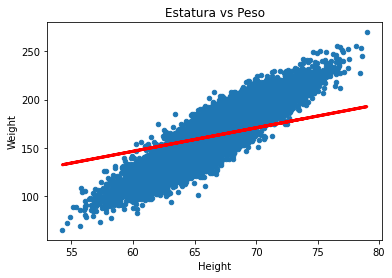

In [24]:
#Gráfico de la nube de puntos
df.plot(
    kind = 'scatter',
    x = 'Height',
    y = 'Weight',
    title = 'Estatura vs Peso'
)

#Obtenemos los Y
y_hipotesis = recta(x_real, w[indice], b)

#Gráfico de la mejor recta
plt.plot(x_real, y_hipotesis, color = 'red', linewidth = '3')